In [16]:
from src import ODE_euler
import math
import matplotlib.pyplot as plt

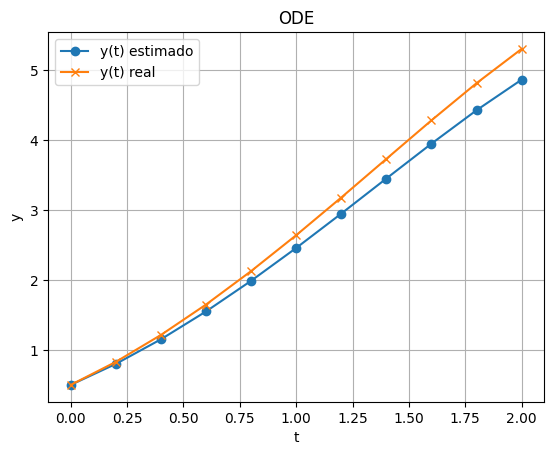

In [18]:
ys, ts, h = ODE_euler(
    a=0,
    b=2,
    N=10,
    y_t0=0.5,
    f=lambda t, y: y - t**2 + 1
)

def solucionExacta(t):
    return (t + 1) ** 2 - 0.5 * math.e**t

exact_vals = [solucionExacta(t) for t in ts]
plt.plot(ts, ys, marker="o", label="y(t) estimado")
plt.plot(ts, exact_vals, marker="x", label="y(t) real")

plt.title("ODE")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

### CON DISTINTOS VALORES DE N

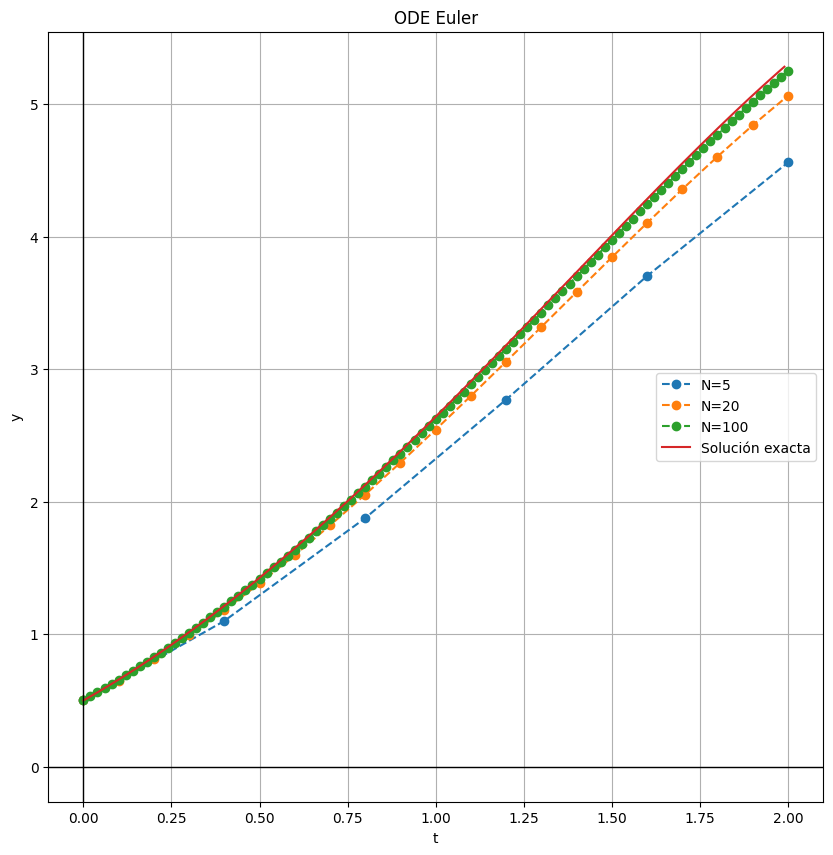

In [66]:
def exact_solution(t):
    return (t + 1) ** 2 - 0.5 * math.e**t

N_values = [5, 20, 100]

plt.figure(figsize=(10, 10))

for N in N_values:
    ys, ts, h = ODE_euler(
        a=0,
        b=2,
        N=N,
        y_t0=0.5,
        f=lambda t, y: y - t**2 + 1
    )
    plt.plot(ts, ys, marker="o", label=f"N={N}",  linestyle="--")

ts_exact = [i * 0.01 for i in range(200)] 
ys_exact = [exact_solution(t) for t in ts_exact]
plt.plot(ts_exact, ys_exact, label="Solución exacta")

plt.axhline(0, color="k", linewidth=1)
plt.axvline(0, color="k", linewidth=1)

plt.title("ODE Euler")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

### CON DISTINTA ECUACIÓN Y RANGO

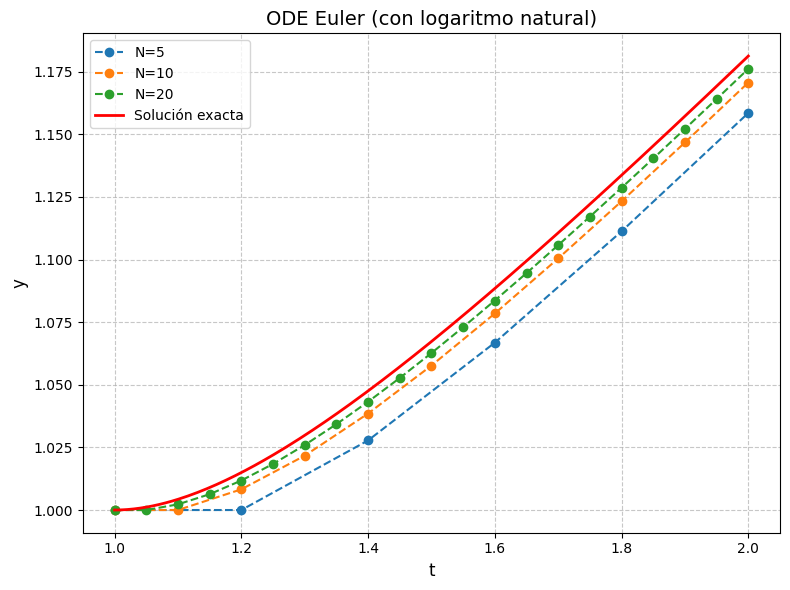

In [73]:
def exact_solution(t):
    return t / (1 + math.log(t))

def ODE_euler(a, b, N, y_t0, f):
    h = (b - a) / N
    ts = [a + i * h for i in range(N + 1)]
    ys = [y_t0]
    for i in range(N):
        ys.append(ys[-1] + h * f(ts[i], ys[-1]))
    return ys, ts, h

N_values = [5, 10, 20]

plt.figure(figsize=(8, 6))

for N in N_values:
    ys, ts, h = ODE_euler(
        a=1,
        b=2,
        N=N,
        y_t0=1,
        f=lambda t, y: ((y/t) - (y/t)**2)
    )
    plt.plot(ts, ys, marker="o", linestyle="--", label=f"N={N}")

ts_exact = [1 + i * (1 / 199) for i in range(200)]
ys_exact = [exact_solution(t) for t in ts_exact]
plt.plot(ts_exact, ys_exact, color="red", linewidth=2, label="Solución exacta")

plt.title("ODE Euler (con logaritmo natural)", fontsize=14)
plt.xlabel("t", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()

plt.show()


Al incrementar N, el rango se divide en un mayor número de subintervalos más pequeños. Visualmente, esto se traduce en que la solución numérica se aproxima cada vez más a la función real. Por lo que, al aumentar N, se logra una mayor precisión en la aproximación de la solución exacta, evidenciando que el método de Euler converge hacia la función real a medida que N crece.